In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def mse(original, compressed):
    return np.mean((original - compressed) ** 2)

def psnr(original, compressed):
    mse_value = mse(original, compressed)
    if mse_value == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

def compress_channel(channel, k):
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vtk = Vt[:k, :]
    return np.dot(Uk, np.dot(Sk, Vtk))

def compress_image_color(image, k):
    compressed_channels = [compress_channel(image[:, :, i], k) for i in range(3)]
    compressed_image = np.stack(compressed_channels, axis=2)
    return np.clip(compressed_image, 0, 255).astype(np.uint8)


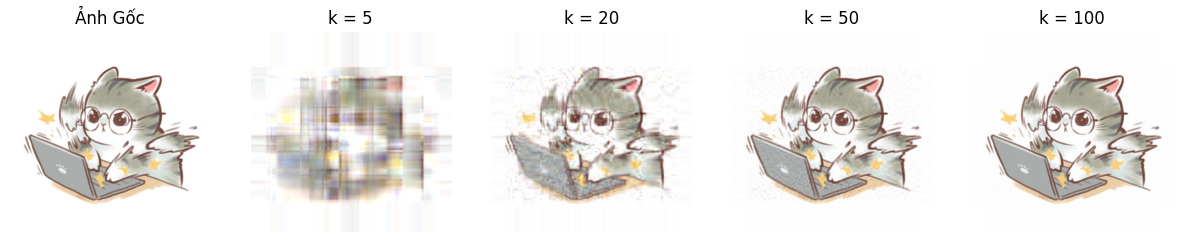

In [3]:
#ƒê·ªçc ·∫£nh m√†u
image_path = os.path.join("img.jpg")  # C·∫≠p nh·∫≠t ƒë∆∞·ªùng d·∫´n ·∫£nh
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuy·ªÉn sang RGB
original_size = os.path.getsize(image_path)  # Dung l∆∞·ª£ng ·∫£nh g·ªëc (bytes)
m, n, _ = image.shape  # K√≠ch th∆∞·ªõc ·∫£nh g·ªëc

# Ch·ªçn c√°c m·ª©c n√©n
k_values = [5, 20, 50, 100]
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 6))
axes[0].imshow(image)
axes[0].set_title("·∫¢nh G·ªëc")
axes[0].axis('off')

for i, k in enumerate(k_values):
    compressed_img = compress_image_color(image, k)
    axes[i + 1].imshow(compressed_img)
    axes[i + 1].set_title(f"k = {k}")
    axes[i + 1].axis('off')
plt.show()


In [4]:
# ƒê√°nh gi√° ch·∫•t l∆∞·ª£ng ·∫£nh
for k in k_values:
    compressed_img = compress_image_color(image, k)

    # T√≠nh MSE & PSNR
    mse_value = mse(image, compressed_img)
    psnr_value = psnr(image, compressed_img)

    # T√≠nh to√°n k√≠ch th∆∞·ªõc ·∫£nh n√©n
    compressed_size_pixels = (m * k) * 3 + k * 3 + (n * k) * 3  # T·ªïng s·ªë ph·∫ßn t·ª≠ l∆∞u tr·ªØ
    compressed_size_bytes = compressed_size_pixels  # Gi·∫£ s·ª≠ m·ªói ph·∫ßn t·ª≠ chi·∫øm 1 byte
    compression_ratio_estimated = original_size / compressed_size_bytes

    # L∆∞u ·∫£nh n√©n ƒë·ªÉ ki·ªÉm tra dung l∆∞·ª£ng th·ª±c t·∫ø
    compressed_path = f'compressed_k{k}.jpeg'
    cv2.imwrite(compressed_path, cv2.cvtColor(compressed_img, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_JPEG_QUALITY, 90])
    actual_compressed_size = os.path.getsize(compressed_path)  # Dung l∆∞·ª£ng th·ª±c t·∫ø (bytes)
    compression_ratio_actual = original_size / actual_compressed_size

    print(f"\nüìâ ƒê·ªëi v·ªõi k = {k}:")
    print(f"  üîπ K√≠ch th∆∞·ªõc ·∫£nh g·ªëc: {m} x {n} pixels")
    print(f"  üîπ K√≠ch th∆∞·ªõc ·∫£nh n√©n (∆∞·ªõc l∆∞·ª£ng): {compressed_size_pixels:.0f} pixels")
    print(f"  üîπ Dung l∆∞·ª£ng ·∫£nh g·ªëc: {original_size / 1024:.2f} kB")
    print(f"  üîπ Dung l∆∞·ª£ng ·∫£nh n√©n (∆∞·ªõc l∆∞·ª£ng): {compressed_size_bytes / 1024:.2f} kB")
    print(f"  üîπ Dung l∆∞·ª£ng file th·ª±c t·∫ø: {actual_compressed_size / 1024:.2f} kB")
    print(f"  üîπ T·ªâ l·ªá n√©n (∆∞·ªõc l∆∞·ª£ng): {compression_ratio_estimated:.2f}x")
    print(f"  üîπ T·ªâ l·ªá n√©n (th·ª±c t·∫ø): {compression_ratio_actual:.2f}x")
    print(f"  üîπ MSE: {mse_value:.2f}")
    print(f"  üîπ PSNR: {psnr_value:.2f} dB")


üìâ ƒê·ªëi v·ªõi k = 5:
  üîπ K√≠ch th∆∞·ªõc ·∫£nh g·ªëc: 1280 x 1280 pixels
  üîπ K√≠ch th∆∞·ªõc ·∫£nh n√©n (∆∞·ªõc l∆∞·ª£ng): 38415 pixels
  üîπ Dung l∆∞·ª£ng ·∫£nh g·ªëc: 76.06 kB
  üîπ Dung l∆∞·ª£ng ·∫£nh n√©n (∆∞·ªõc l∆∞·ª£ng): 37.51 kB
  üîπ Dung l∆∞·ª£ng file th·ª±c t·∫ø: 101.14 kB
  üîπ T·ªâ l·ªá n√©n (∆∞·ªõc l∆∞·ª£ng): 2.03x
  üîπ T·ªâ l·ªá n√©n (th·ª±c t·∫ø): 0.75x
  üîπ MSE: 54.94
  üîπ PSNR: 30.73 dB

üìâ ƒê·ªëi v·ªõi k = 20:
  üîπ K√≠ch th∆∞·ªõc ·∫£nh g·ªëc: 1280 x 1280 pixels
  üîπ K√≠ch th∆∞·ªõc ·∫£nh n√©n (∆∞·ªõc l∆∞·ª£ng): 153660 pixels
  üîπ Dung l∆∞·ª£ng ·∫£nh g·ªëc: 76.06 kB
  üîπ Dung l∆∞·ª£ng ·∫£nh n√©n (∆∞·ªõc l∆∞·ª£ng): 150.06 kB
  üîπ Dung l∆∞·ª£ng file th·ª±c t·∫ø: 138.41 kB
  üîπ T·ªâ l·ªá n√©n (∆∞·ªõc l∆∞·ª£ng): 0.51x
  üîπ T·ªâ l·ªá n√©n (th·ª±c t·∫ø): 0.55x
  üîπ MSE: 36.53
  üîπ PSNR: 32.50 dB

üìâ ƒê·ªëi v·ªõi k = 50:
  üîπ K√≠ch th∆∞·ªõc ·∫£nh g·ªëc: 1280 x 1280 pixels
  üîπ K√≠ch th∆∞·ªõc ·∫£nh n√©n (∆∞·ªõc l∆∞·ª£ng): 384150 pix